# Inf-gram practical on supervised learning


**Objectives :**
Implementation and envaluation of a SVM classificator in Python

# Data set


The objective is to create a binary classificator for the Indiens PIMA. We have 768 entry observations with 8 features and one target variable. https://www.kaggle.com/uciml/pima-indians-diabetes-database




- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

##  Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
SEED = 42


##  Read and manipulate dataframes with pandas

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rakelup/EPICLIN2021/master/diabetes.csv", sep=",")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data overview

In [3]:

print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values:  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values:   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_court = df[['Insulin','Glucose']]

df_court.drop('Insulin', inplace= True, axis = 1)

df_court.head()

C:\Users\lrnv\AppData\Local\Temp\ipykernel_19964\1421224458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_court.drop('Insulin', inplace= True, axis = 1)


,Glucose
0,148
1,85
2,183
3,89
4,137


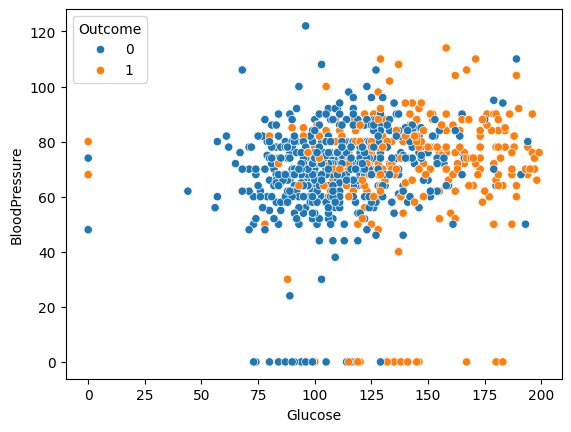

In [7]:
g =sns.scatterplot(x="Glucose", y="BloodPressure",hue="Outcome", data=df);


###  Diabetiques Vs Non-Diabetiques

Exercice : Visualization de la distribution de Glucose, et de la BloodPreasure pour les diabetiques et pour les non diabetiques.



<Axes: title={'center': 'Glucose'}>

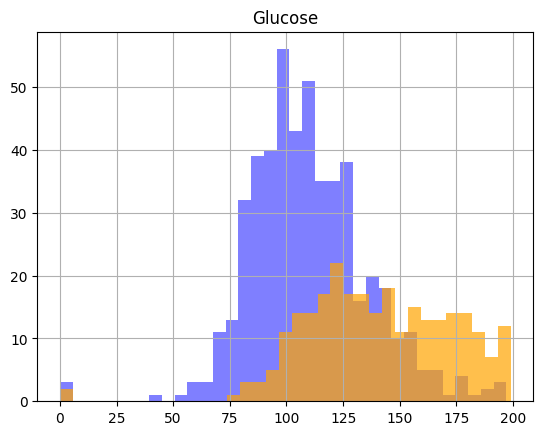

In [8]:

feature = 'Glucose'
df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5).set_title(feature)
df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7)

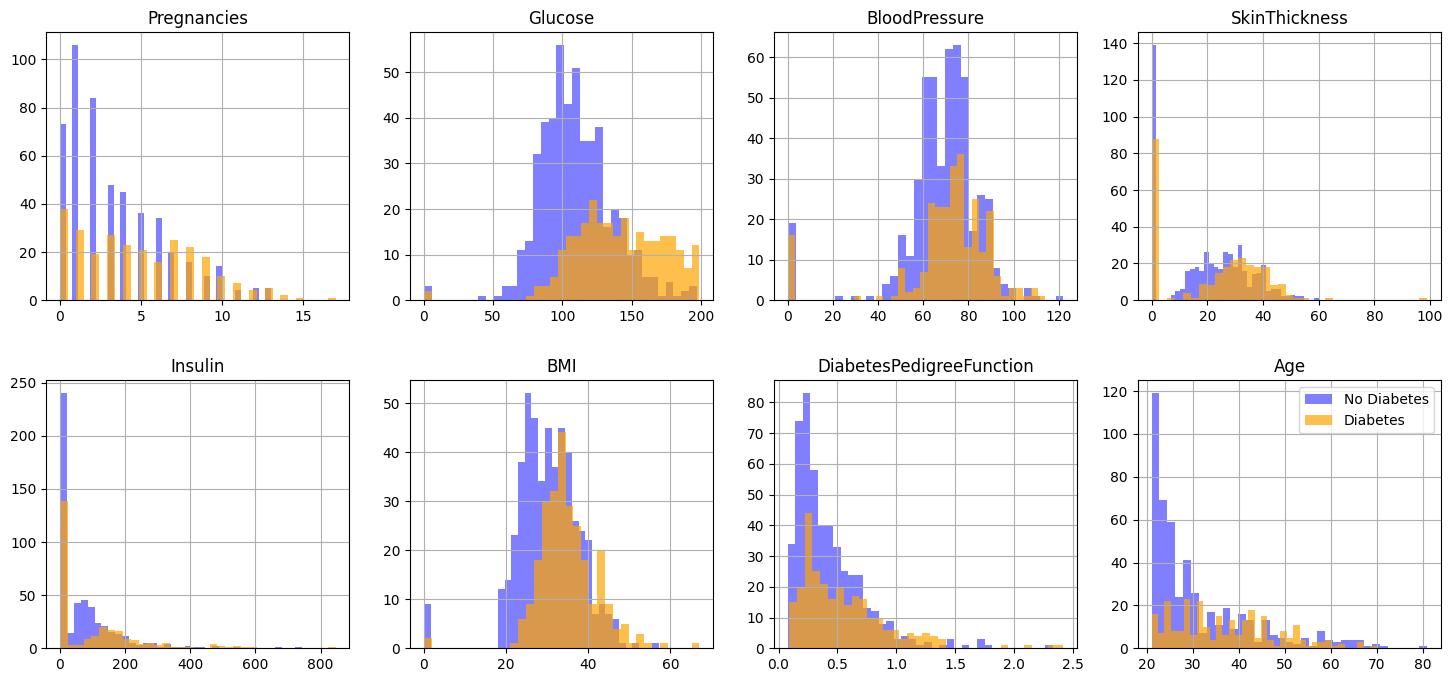

In [9]:

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS

    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])

plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

###Pairwise representations

C:\Users\lrnv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


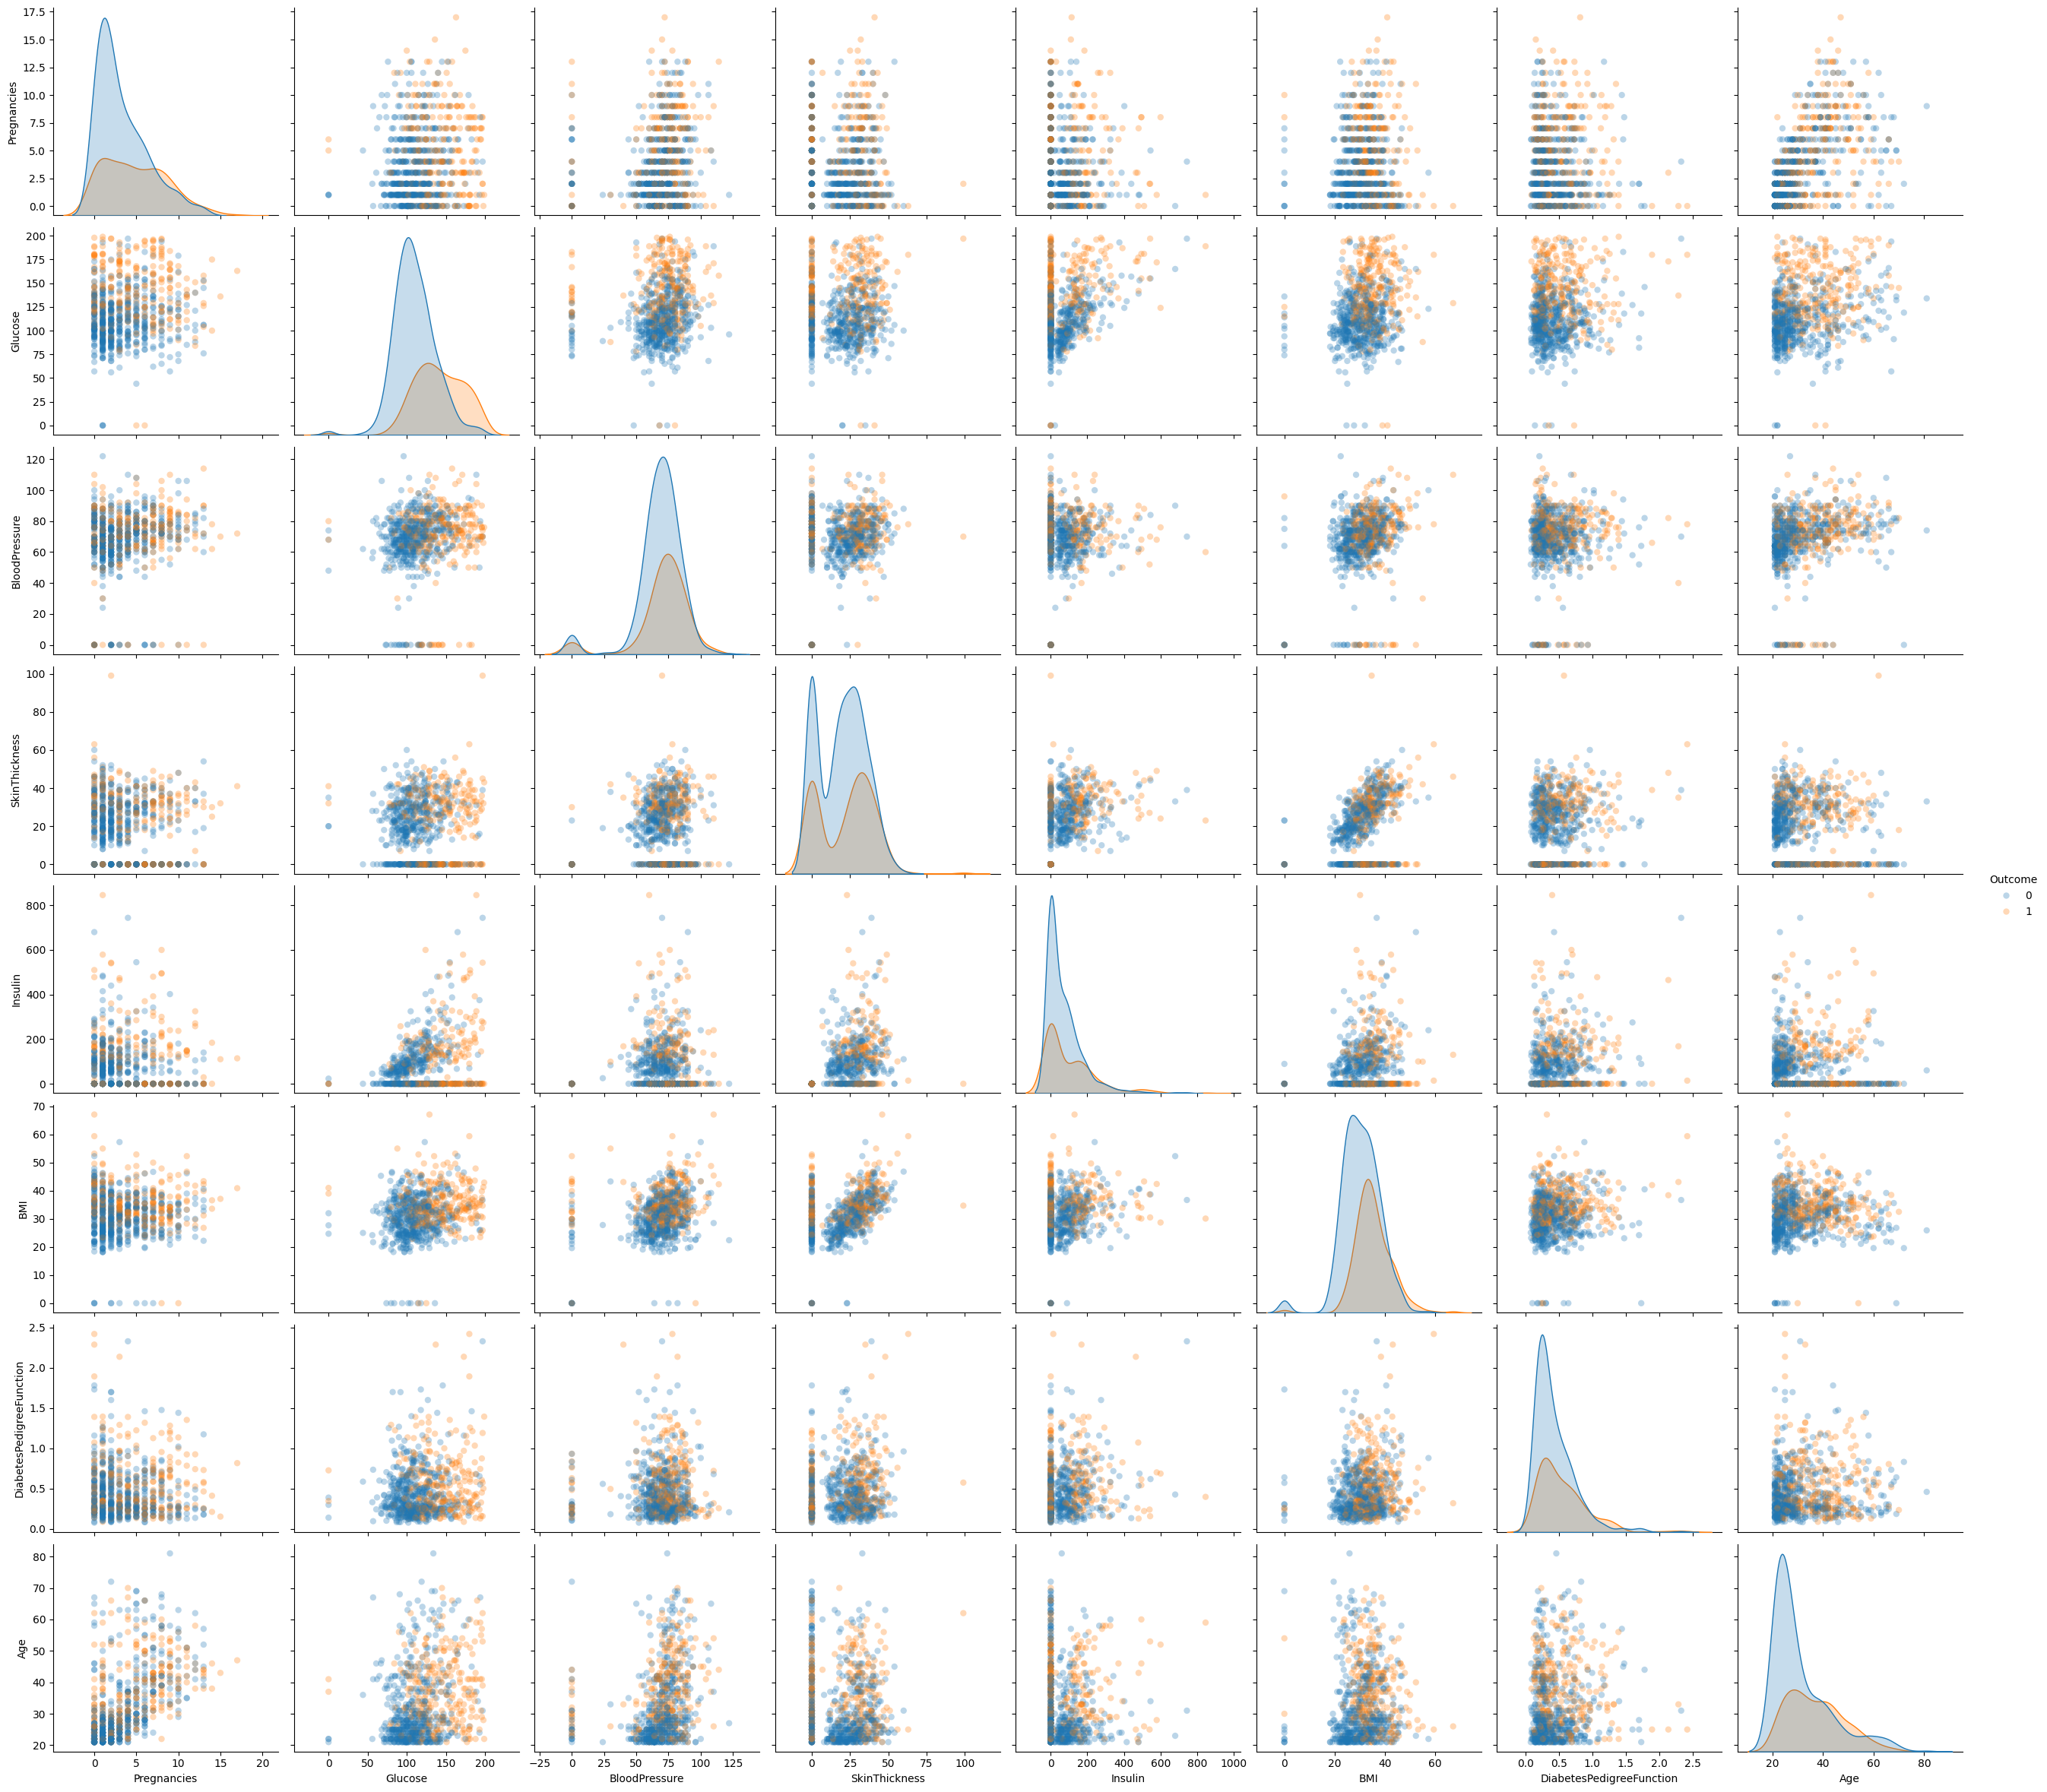

In [10]:
# Visualization par pairs
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=3, aspect=1.1)

### Matrix de correlation

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

(9.5, -0.5)

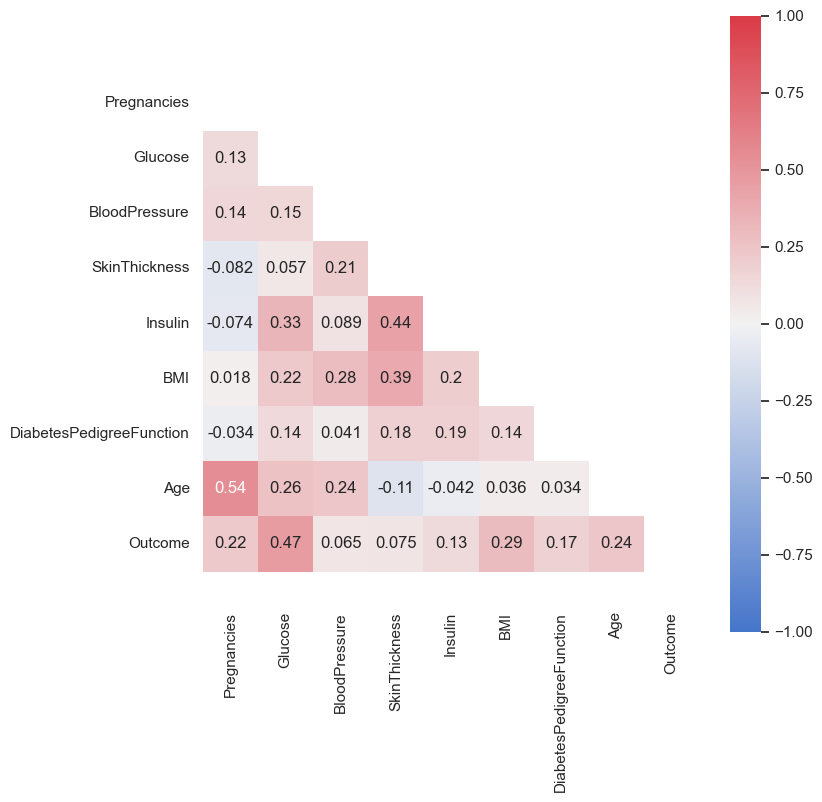

In [11]:
# Calcule de la matrix de corrélation
# https://datatofish.com/correlation-matrix-pandas/

correlation_matrix = df.corr()
print(correlation_matrix)

#Visualisation de la matrice de corrélation (Heatmap)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## Machine Learning Scikit-Learn

### Split the data set into input features, X, and target feature, y.

In [12]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
print(X.shape, y.shape)

# type(X)   # pandas.core.frame.DataFrame
# type(y)   # pandas.core.series.Series

(768, 8) (768,)


###Feature scaling

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.


- **Min-max scaling** ( normalization) : values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.


- **Standardization** : first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, **standardization does not bound values to a specific range**, which may be a problem for some algo‐ rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐ ever, **standardization is much less affected by outliers**.  Scikit-Learn provides a transformer called **StandardScaler** for standardization.


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [13]:
# If needed : !pip install scikit-learn

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)



X_scaled (768, 8)


In [15]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
df_stand = pd.DataFrame(X_scaled, columns = X.columns)

In [17]:
df_stand.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


1. **Exercise 1 :** Have a look on the obtained values.
2. **Exercice 2 :** Normalize the values between 0 and 1.


In [18]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_man_mix = scaler.transform(X)

###  Split the data into trainning and test data set





 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:


# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


**Exercise :** What does it mean stratify = y?

**Exercise :** Check the proportion of diabetics patients in both training and test dataset, check this proportion again without indicating stratify = y.



In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.2, random_state=SEED)

In [21]:

proportionTest2 = y_test2.value_counts() / y_test2.count()
print (proportionTest2)

proportionTrain2 = y_train2.value_counts() / y_train2.count()
print (proportionTrain2)


Outcome
0    0.642857
1    0.357143
Name: count, dtype: float64
Outcome
0    0.653094
1    0.346906
Name: count, dtype: float64


In [22]:

proportionTest1 = y_test.value_counts() / y_test2.count()
print (proportionTest1)



Outcome
0    0.649351
1    0.350649
Name: count, dtype: float64


# Classification with Scikit-learn


In scikit learn all objects share a consistent and simple interface:

- **Estimators:** Any object that can estimate some parameters based on a dataset is called an estimator . *The estimation itself is performed by the **fit()** method*, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter.

- **Transformers:** Some estimators can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the **transform()** method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).

- **Predictors:** Finally, some estimators are capable of making predictions given a dataset; they are called predictors.
 A predictor has a **predict()** method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set.

- **Inspection:** All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., clf.kernel), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., clf.support_).




###Classificator SVM

In [25]:
from sklearn import svm

clf = svm.SVC() # We declare the estimator with its hyperparameters
clf.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf.predict(X_test)
y_pred



array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [24]:
clf_sv_li = svm.SVC(kernel='linear', C = 10)
clf_sv_li.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf_sv_li.predict(X_test)

In [27]:
clf_sv_poli = svm.SVC(kernel='polynomial', degree = 3)
clf_sv_li.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf_sv_li.predict(X_test)

In [26]:
clf.kernel

'rbf'

In [31]:
clf.kernel #hyperparameters
clf.support_ #learned parameters


array([  1,   3,  13,  17,  18,  19,  25,  26,  27,  30,  31,  35,  47,
        48,  51,  52,  57,  61,  62,  69,  70,  76,  81,  82,  83,  86,
        88,  89,  93,  95,  96, 103, 106, 117, 118, 119, 124, 130, 132,
       133, 137, 140, 141, 142, 145, 147, 150, 153, 157, 160, 162, 164,
       165, 168, 172, 173, 174, 177, 178, 182, 183, 184, 185, 190, 194,
       195, 200, 201, 210, 220, 224, 227, 231, 234, 236, 240, 241, 245,
       246, 248, 249, 254, 257, 261, 262, 265, 271, 274, 275, 277, 281,
       286, 296, 297, 299, 304, 307, 315, 320, 321, 322, 323, 328, 329,
       330, 338, 340, 343, 345, 348, 351, 355, 359, 368, 371, 376, 380,
       382, 383, 392, 396, 397, 405, 407, 417, 423, 424, 425, 429, 433,
       434, 436, 437, 440, 443, 444, 451, 452, 454, 458, 466, 476, 477,
       478, 483, 486, 487, 493, 496, 501, 505, 507, 512, 513, 519, 524,
       525, 526, 528, 529, 536, 538, 543, 547, 549, 550, 555, 556, 559,
       570, 572, 576, 577, 581, 585, 587, 595, 596, 597, 611, 61

In [32]:
clf.n_support_

array([181, 180])

In [33]:
y_test

44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64

###Model evaluation:


**Question :** What is the objetive of our classificator ?


#### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred, normalize = 'all')
print(cf_matrix)


[[0.57142857 0.07792208]
 [0.2012987  0.14935065]]


[[0.88       0.12      ]
 [0.57407407 0.42592593]]


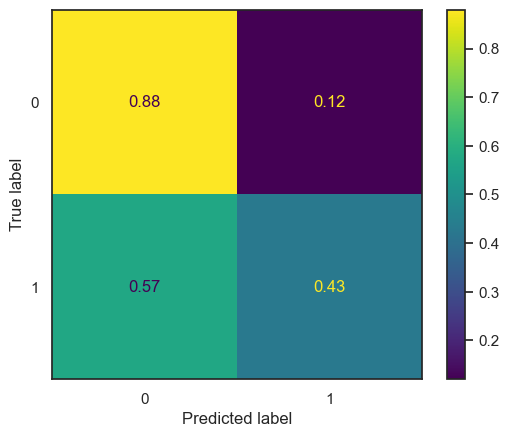

In [37]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')
print(cf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=clf.classes_)
disp.plot()

plt.show()

[[0.7394958  0.34285714]
 [0.2605042  0.65714286]]


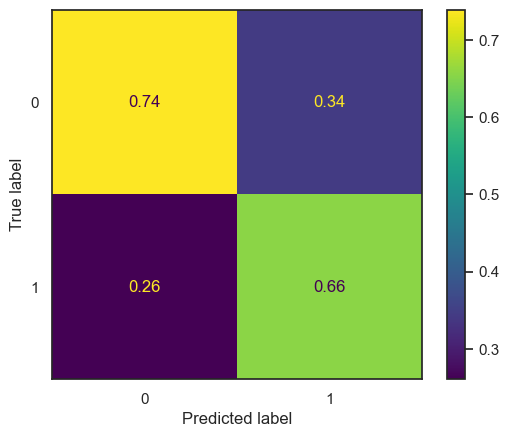

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize = 'pred')
print(cf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=clf.classes_)
disp.plot()

plt.show()

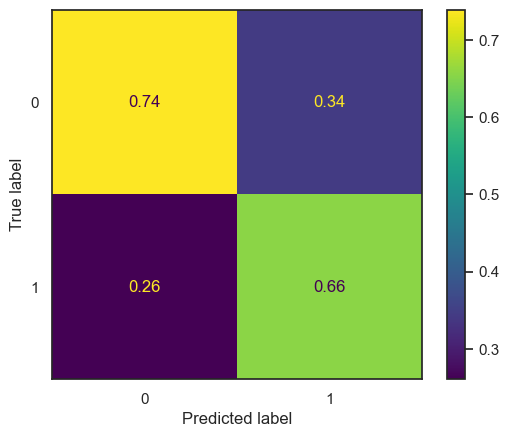

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=clf.classes_)
disp.plot()

plt.show()

Exercise : Print de confusion matrix for the train dataset

[[0.7394958  0.34285714]
 [0.2605042  0.65714286]]


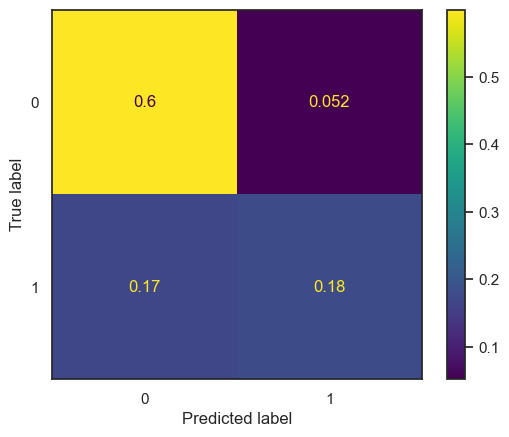

In [41]:
y_pred_train= clf.predict(X_train)

cf_matrix_train = confusion_matrix(y_train, y_pred_train, normalize = 'all')

print(cf_matrix)

disp=ConfusionMatrixDisplay(cf_matrix_train, display_labels=clf.classes_ )
disp.plot()

plt.show()

Exercise : Calculate the Precion, recall and the F1-score for the differnt classifiers that we have implemented
-Linear SVM
-Polinomial SVM
-RBF SVM
Which model provides the best sensitivity AKA recall?


####Quality measures
https://scikit-learn.org/stable/modules/model_evaluation.html






In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7142857142857143

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.56

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5185185185185185

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5185185185185185

In [32]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6086956521739131

####Courbe ROC##

Receiver operating characteristic, is a graph representing the performance of a classification model for all classification thresholds. This curve plots the rate of true positives as a function of the rate of false positives:

True positive rate
False positive rate

This curve serves two purposes

1. **Compare models:**  The larger the area under the curve, the better our model.
2. **Choose an optimal threshold:** The ideal threshold is the best compromise between sensitivity and specificity. Corresponds to the point both closest to the ideal (1,1) and at the same time farthest from the diagonal.







[0.   0.18 1.  ]
[0.         0.51851852 1.        ]
[inf  1.  0.]


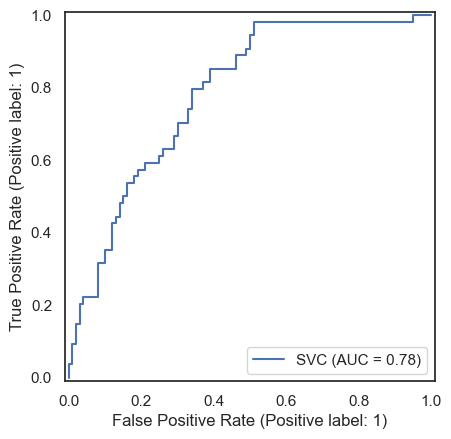

In [33]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [34]:

auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')

##Improving the model : Tunning the hyper-parameters
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html




In [35]:
clf_poly = svm.SVC(kernel = 'poly', C = 1, degree = 3, class_weight = 'balanced') # We declare the estimator with its hyperparameters
clf_poly.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf_poly.predict(X_test)
auc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

In [36]:
auc_score

0.6735185185185186

In [37]:

f1_score

0.7100432405972097

**Exercise :** Try the SVC classificator with and RBF kernel and various different various of gamma.
Calculate the f1, the recall,  the accuray and the AUC as evaluation metrics . Use different types of features norrmalization.

Which types of kernel and which hyper-parameters are the best?

##How to choose the best parameters
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm


gamma_vector = np.linspace(1e-4,1e-2,num=10)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_vector, 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree' : [2,3,4,5]}]

scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(class_weight= 'balanced'), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for recall



C:\Users\lrnv\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters set found on development set:

{'C': 100, 'degree': 2, 'kernel': 'poly'}

Grid scores on development set:

0.738 (+/-0.070) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.735 (+/-0.057) for {'C': 1, 'gamma': 0.0012000000000000001, 'kernel': 'rbf'}
0.734 (+/-0.083) for {'C': 1, 'gamma': 0.0023, 'kernel': 'rbf'}
0.692 (+/-0.091) for {'C': 1, 'gamma': 0.0034, 'kernel': 'rbf'}
0.644 (+/-0.104) for {'C': 1, 'gamma': 0.0045000000000000005, 'kernel': 'rbf'}
0.610 (+/-0.070) for {'C': 1, 'gamma': 0.005600000000000001, 'kernel': 'rbf'}
0.586 (+/-0.063) for {'C': 1, 'gamma': 0.0067, 'kernel': 'rbf'}
0.559 (+/-0.050) for {'C': 1, 'gamma': 0.0078000000000000005, 'kernel': 'rbf'}
0.558 (+/-0.049) for {'C': 1, 'gamma': 0.0089, 'kernel': 'rbf'}
0.556 (+/-0.028) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.734 (+/-0.048) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.680 (+/-0.043) for {'C': 10, 'gamma': 0.0012000000000000001, 'kernel': 'rbf'}
0.669 (+/-0.070) for {'C': 10, 'gam